## Face Detection with Python using OpenCV

Face detection is a computer vision technology that helps to locate/visualize human faces in digital images. This technique is a specific use case of object detection technology that deals with detecting instances of semantic objects of a certain class (such as humans, buildings or cars) in digital images and videos. With the advent of technology, face detection has gained a lot of importance especially in fields like photography, security, and marketing.



### Load the necessary Libraries

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Load the image and convert to gray image

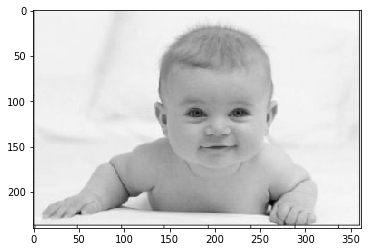

In [0]:
#Loading the image to be tested
test_image = cv2.imread('/content/babyboy.jpg')
#Converting to grayscale
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
# Displaying the grayscale image
plt.imshow(test_image_gray, cmap='gray')

Since we know that OpenCV loads an image in BGR format, so we need to convert it into RBG format to be able to display its true colors. Let us write a small function for that.

In [0]:
def convertToRGB(image):
   return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

**Haar cascade files**

OpenCV comes with a lot of pre-trained classifiers

In [0]:
haar_cascade_face  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

**Face detection**


We shall be using the **detectMultiscale** module of the classifier. This function will return a rectangle with coordinates(x,y,w,h) around the detected face. This function has two important parameters which have to be tuned according to the data.


*   **scalefactor** In a group photo, there may be some faces which are near the camera than others. Naturally, such faces would appear more prominent than the ones behind. This factor compensates for that.


*   **minNeighbors** This parameter specifies the number of neighbors a rectangle should have to be called a face. 



In [0]:
faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5);

In [0]:
# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  1


loop over all the coordinates and draw rectangles around them using Open CV

In [0]:
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

Finally, we shall display the original image in colored to see if the face has been detected correctly or not.

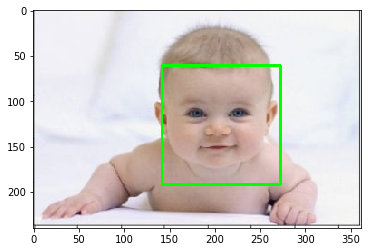

In [0]:
#convert image to RGB and show image
plt.imshow(convertToRGB(test_image))

### Face Detection with generalized function


In [0]:
def detect_faces(haar_cascade_face_name, test_image, rect_size = 2, scaleFactor = 1.1, minNeighbors = 5):
  #create a copy of an image to prevent the changes on original image
  image_copy = test_image.copy()
  #convert the test image to gray scale as opencv face detector expects gray images
  gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)
  cascade  = cv2.CascadeClassifier(cv2.data.haarcascades + haar_cascade_face_name)
  #applying Haar classifier to detect the face
  faces_rect =  cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
  for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), rect_size)
  return image_copy

Now, Testing the function on new image

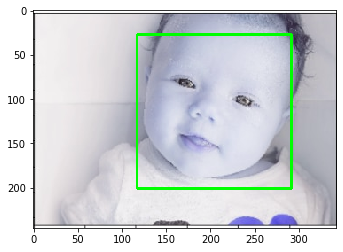

In [0]:
final_gray_image = detect_faces('haarcascade_frontalface_default.xml',cv2.imread('/content/babyboy1.jpg'))
plt.imshow(final_gray_image)

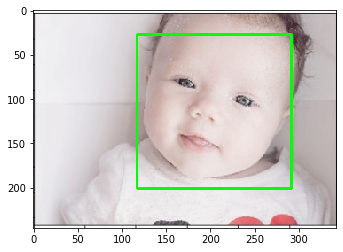

In [0]:
#with BGR to RGB color
plt.imshow(cv2.cvtColor(final_gray_image, cv2.COLOR_BGR2RGB))

### Testing the function on a group image

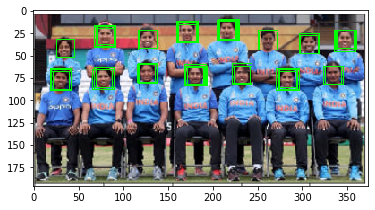

In [0]:
test_image2 = cv2.imread('/content/woman_cricket_team.jpg')
faces  = detect_faces('haarcascade_frontalface_alt2.xml',test_image2,1, minNeighbors=0)
plt.imshow(cv2.cvtColor(faces, cv2.COLOR_BGR2RGB))

Note: haarcascade_frontalface_alt2 is working well with minNeighbors = 0
Unable to detect the face by using haarcascade_frontalface_default